In [0]:
import pandas as pd
import tensorflow as tf
import numpy as np
import nltk

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
df = pd.read_csv('/content/drive/My Drive/dl_project/reviews.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513966 entries, 0 to 1513965
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   listing_id     1513966 non-null  int64 
 1   id             1513966 non-null  int64 
 2   date           1513966 non-null  object
 3   reviewer_id    1513966 non-null  int64 
 4   reviewer_name  1513965 non-null  object
 5   comments       1513250 non-null  object
dtypes: int64(3), object(3)
memory usage: 69.3+ MB


In [4]:
df

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,13913,80770,2010-08-18,177109,Michael,My girlfriend and I hadn't known Alina before ...
1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...
2,13913,529579,2011-09-13,1110304,Kristin,Alina is an amazing host. She made me feel rig...
3,13913,595481,2011-10-03,1216358,Camilla,"Alina's place is so nice, the room is big and ..."
4,13913,612947,2011-10-09,490840,Jorik,"Nice location in Islington area, good for shor..."
...,...,...,...,...,...,...
1513961,43101031,622347514,2020-04-13,32280792,Arxhend,Very spacious for a 2 bed. Amazing location. V...
1513962,43102348,621824134,2020-04-05,182649701,Karolina,Nice place close to airport unfortunately no ...
1513963,43114567,622193992,2020-04-11,151438732,Hujat,The host was always available and responded to...
1513964,43115959,622012488,2020-04-08,212104410,Lorita,Would defo be coming back and very soon. A goo...


In [5]:
df=df.dropna(axis=0)
df.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

In [6]:
#중복이 아닌 데이터 확인
df['comments'].nunique()

1449905

In [7]:
#중복 데이터 제거
df.drop_duplicates(subset=['comments'], inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449905 entries, 0 to 1513965
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   listing_id     1449905 non-null  int64 
 1   id             1449905 non-null  int64 
 2   date           1449905 non-null  object
 3   reviewer_id    1449905 non-null  int64 
 4   reviewer_name  1449905 non-null  object
 5   comments       1449905 non-null  object
dtypes: int64(3), object(3)
memory usage: 77.4+ MB


In [9]:
df['comments'] = df['comments'].str.replace('[^a-zA-Z]', ' ', regex=True) #영어 제외한 문자 제거
df['comments'] = df['comments'].str.lower() #소문자 변환

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
df['comments'].replace('', np.nan, inplace=True) #공백값에 nan
df['comments']

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


0          my girlfriend and i hadn t known alina before ...
1          alina was a really good host  the flat is clea...
2          alina is an amazing host  she made me feel rig...
3          alina s place is so nice  the room is big and ...
4          nice location in islington area  good for shor...
                                 ...                        
1513961    very spacious for a   bed  amazing location  v...
1513962    nice place  close to airport unfortunately no ...
1513963    the host was always available and responded to...
1513964    would defo be coming back and very soon  a goo...
1513965    if you want to stay somewhere homey  clean  st...
Name: comments, Length: 1449905, dtype: object

In [11]:
df.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

In [12]:
df = df.dropna(axis=0)
len(df)

1449905

In [0]:
from sklearn.model_selection import train_test_split

#데이터셋 나누기
train, test = train_test_split(df, test_size=0.3)

In [14]:
print(len(train))
print(len(test))

1014933
434972


In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

#https://statkclee.github.io/nlp2/nlp-sentiment.html

#vader 어휘사전
#긍정이면 1 부정이면 0 매핑해줌

analyser = SentimentIntensityAnalyzer()

def vader_polarity(text):
    score = analyser.polarity_scores(text)
    return 1 if score['pos'] > score['neg'] else 0

train['label'] = train['comments'].apply(vader_polarity)
test['label'] = test['comments'].apply(vader_polarity)

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [16]:
train_one = train[train['label']==1]
train_one = train_one.sample(n=60000)
train_zero = train[train['label']==0]
train_zero = train_zero.sample(n=60000)
train = pd.concat([train_one, train_zero])
train

,listing_id,id,date,reviewer_id,reviewer_name,comments,label
191080,2374323,50901904,2015-10-15,21136098,David,the host was away but their housekeeper met us...,1
463976,8757838,284111437,2018-07-01,37870552,Gemma,this house was a great place to stay for the w...,1
11469,107051,689456,2011-11-03,1217712,Bertrand,marvellous narrow boat and a very nice host,1
290913,4612667,25860907,2015-01-27,26245646,Gautam,paul and emma are great hosts and moreover lov...,1
870724,18452656,151365390,2017-05-12,97740583,Jean-Rene,as described min walk to cw good mattress ...,1
...,...,...,...,...,...,...,...
759721,16293382,567397902,2019-11-22,268267992,Marina,el piso y el anfitri n son estupendos lo nic...,0
581582,12443383,165954020,2017-07-02,36169672,Arturo,the room was a bit small for a double room,0
1439793,36672988,540331828,2019-10-03,122620818,Jessica,cheap airbnb but i would definitely not return...,0
924144,19600672,366191317,2019-01-02,190291854,Roland,die unterkunft ist sch n und ruhig gelegen al...,0


In [17]:
test_one = test[test['label']==1]
test_one = test_one.sample(n=20000)
test_zero = test[test['label']==0]
test_zero = test_zero.sample(n=20000)
test = pd.concat([test_one, test_zero])
test

,listing_id,id,date,reviewer_id,reviewer_name,comments,label
1091240,23031844,288616999,2018-07-10,55729069,Tania,great location and nice space being undergrou...,1
573276,12252728,116644955,2016-12-02,102484396,Kripa,the room was very neat and the location was ve...,1
1039686,21762398,503693606,2019-08-06,31267682,Caroline,liz is a lovely lady and made me feel very wel...,1
922434,19563268,206005246,2017-10-23,109515889,Danielle,terrific just as advertised loved the stay,1
645347,13951401,114812323,2016-11-20,25878658,Raquel,dorothee and her family were great hosts help...,1
...,...,...,...,...,...,...,...
618636,13355240,206447028,2017-10-25,96263454,Almudena,ifty qu muy atento en todo momento explicaci...,0
1241008,27744318,575179205,2019-12-09,32478910,Michel,pour les fran ais et les non british rentrez...,0
9757,97178,438616502,2019-04-17,231821904,민주,...,0
1158476,24893201,442439205,2019-04-23,84307253,Amrit,place was terrible i never been to that much ...,0


In [18]:
print(train.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  60000
1      1  60000


In [19]:
print(test.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  20000
1      1  20000


In [20]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('wordnet')
nltk.download('stopwords')

#https://m.blog.naver.com/PostView.nhn?blogId=qbxlvnf11&logNo=221434157182&proxyReferer=https:%2F%2Fwww.google.com%2F
#https://wikidocs.net/44249

x_train = []

for sentence in train['comments']:
    words = []

    #공백을 기준으로 문장 나눔
    words = sentence.split()

    #Stemming : 어간(동사,형용사 같은 용언에서 형태 변하지 않는 부분) 추출
    stemmer = PorterStemmer()
    words = [ stemmer.stem(word) for word in words ]

    #Lemmatization : 표제어(기본단어) 추출
    lmtzr = WordNetLemmatizer()
    words = [lmtzr.lemmatize(word) for word in words]

    #nltk에 있는 영어 불용어를 이용해 불용어 제거
    words = [word for word in words if not word in stopwords.words('english')]
    x_train.append(words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
print(x_train[:5])

[['host', 'wa', 'away', 'housekeep', 'met', 'u', 'speak', 'lot', 'english', 'ok'], ['thi', 'hous', 'wa', 'great', 'place', 'stay', 'weekend', 'go', 'wed', 'mile', 'away', 'quiet', 'residenti', 'road', 'minut', 'walk', 'supermarket', 'cafe', 'realli', 'spaciou', 'wa', 'immacul', 'happi', 'found', 'book', 'kaz', 'hous', 'wa', 'perfect'], ['marvel', 'narrow', 'boat', 'veri', 'nice', 'host'], ['paul', 'emma', 'great', 'host', 'moreov', 'love', 'human', 'made', 'feel', 'veri', 'comfort', 'explain', 'area', 'around', 'gener', 'alway', 'avail', 'need', 'ani', 'inform', 'help', 'room', 'exactli', 'display', 'keep', 'hous', 'veri', 'clean', 'gener', 'veri', 'soul', 'vibe', 'hous', 'locat', 'perfect', 'veri', 'close', 'bustl', 'upper', 'street', 'choic', 'bar', 'restaur', 'cuisin', 'also', 'close', 'multipl', 'conveni', 'store', 'time', 'apart', 'tuck', 'away', 'quit', 'lane', 'like', 'silenc', 'highli', 'recommend', 'thi', 'apart', 'locat'], ['describ', 'min', 'walk', 'cw', 'good', 'mattress', 

In [0]:
x_test = []

for sentence in test['comments']:
    words = []

    #공백을 기준으로 문장 나눔
    words = sentence.split()

    #nltk에 있는 영어 불용어를 이용해 불용어 제거
    words = [word for word in words if not word in stopwords.words('english')]

    #Lemmatization : 표제어(기본단어) 추출
    lmtzr = WordNetLemmatizer()
    words = [lmtzr.lemmatize(word) for word in words]

    #Stemming : 어간(동사,형용사 같은 용언에서 형태 변하지 않는 부분) 추출
    stemmer = PorterStemmer()
    words = [ stemmer.stem(word) for word in words ]
    x_test.append(words)

In [23]:
print(x_test[:5])

[['great', 'locat', 'nice', 'space', 'underground', 'nice', 'cool', 'degre', 'hot', 'day'], ['room', 'neat', 'locat', 'close', 'dlr', 'great', 'busi', 'trip', 'great', 'valu', 'money'], ['liz', 'love', 'ladi', 'made', 'feel', 'welcom', 'home', 'look', 'fair', 'price', 'thank'], ['terrif', 'advertis', 'love', 'stay'], ['dorothe', 'famili', 'great', 'host', 'help', 'charm', 'sure', 'count', 'place', 'pretti', 'super', 'clean', 'quiet', 'area', 'minut', 'walk', 'far', 'live', 'brixton', 'area', 'realli', 'good', 'place', 'weekend', 'london']]


In [24]:
print(type(x_train))

<class 'list'>


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer

#정수로 인코딩하기 위해 단어 집합 생성
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

In [26]:
print(tokenizer.word_index)

{'wa': 1, 'de': 2, 'veri': 3, 'stay': 4, 'la': 5, 'great': 6, 'e': 7, 'place': 8, 'locat': 9, 'et': 10, 'london': 11, 'host': 12, 'est': 13, 'un': 14, 'tr': 15, 'le': 16, 'clean': 17, 'room': 18, 'en': 19, 'n': 20, 'thi': 21, 'apart': 22, 'und': 23, 'nice': 24, 'l': 25, 'recommend': 26, 'flat': 27, 'would': 28, 'u': 29, 'love': 30, 'bien': 31, 'good': 32, 'station': 33, 'die': 34, 'que': 35, 'realli': 36, 'muy': 37, 'walk': 38, 'appart': 39, 'comfort': 40, 'nou': 41, 'pour': 42, 'el': 43, 'need': 44, 'hous': 45, 'close': 46, 'everyth': 47, 'r': 48, 'help': 49, 'well': 50, 'check': 51, 'sehr': 52, 'time': 53, 'ist': 54, 'minut': 55, 'easi': 56, 'home': 57, 'perfect': 58, 'bed': 59, 'bu': 60, 'da': 61, 'also': 62, 'thank': 63, 'get': 64, 'tube': 65, 'commun': 66, 'il': 67, 'con': 68, 'der': 69, 'area': 70, 'londr': 71, 'definit': 72, 'lo': 73, 'super': 74, 'night': 75, 'ha': 76, 'quiet': 77, 'day': 78, 'war': 79, 'welcom': 80, 'one': 81, 'arriv': 82, 'bathroom': 83, 'airbnb': 84, 'restau

In [27]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

vocab_size = total_cnt - rare_cnt + 1 # 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거. 0번 패딩 토큰을 고려하여 +1
print('단어 집합의 크기 :',vocab_size)

단어 집합(vocabulary)의 크기 : 68389
등장 빈도가 2번 이하인 희귀 단어의 수: 40453
단어 집합에서 희귀 단어의 비율: 59.151325505563754
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.2984190036500785
단어 집합의 크기 : 27937


In [0]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [29]:
print(x_train[:3])
print(x_test[:3])

[[12, 1, 151, 3252, 301, 29, 1990, 118, 1613, 532], [21, 45, 1, 6, 8, 4, 467, 124, 3112, 1496, 151, 77, 1125, 294, 55, 38, 418, 452, 36, 169, 1, 1350, 471, 393, 161, 12303, 45, 1, 58], [4605, 1830, 2292, 3, 24, 12]]
[[6, 9, 24, 116, 172, 24, 615, 3970, 387, 78], [18, 1214, 9, 46, 912, 6, 428, 236, 6, 247, 364], [2529, 30, 1232, 120, 131, 80, 57, 162, 616, 285, 63]]


In [0]:
#label 저장
y_train = np.array(train['label'])
y_test = np.array(test['label'])

In [0]:
#길이가 0인 샘플들의 인덱스
drop_train = [index for index, sentence in enumerate(x_train) if len(sentence) < 1]
drop_test = [index for index, sentence in enumerate(x_test) if len(sentence) < 1]

In [32]:
# 빈 샘플들을 제거
x_train = np.delete(x_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(x_train))
print(len(y_train))

113625
113625


In [33]:
x_test = np.delete(x_test, drop_test, axis=0)
y_test = np.delete(y_test, drop_test, axis=0)
print(len(x_test))
print(len(y_test))

37771
37771


리뷰의 최대 길이 : 582
리뷰의 평균 길이 : 32.88940814081408


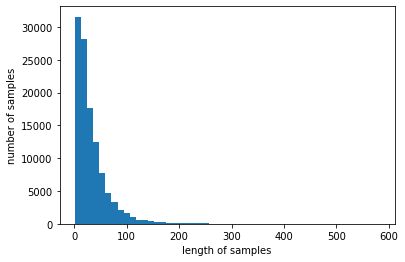

In [34]:
import matplotlib.pyplot as plt


print('리뷰의 최대 길이 :',max(len(l) for l in x_train))
print('리뷰의 평균 길이 :',sum(map(len, x_train))/len(x_train))
plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [35]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

max_len = 100
below_threshold_len(max_len, x_train)

전체 샘플 중 길이가 100 이하인 샘플의 비율: 95.6858085808581


In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras

#리뷰의 길이를 동일하게 맞추기 위해 padding
x_train = keras.preprocessing.sequence.pad_sequences(x_train,
                                                        value=0,
                                                        padding='post',
                                                        maxlen=max_len)

x_test = keras.preprocessing.sequence.pad_sequences(x_test,
                                                       value=0,
                                                       padding='post',
                                                       maxlen=max_len)

In [37]:
print(len(x_train[0]), len(x_train[1]))
print(len(x_test[0]), len(x_test[1]))

100 100
100 100


In [38]:
print(x_train[1])

[   21    45     1     6     8     4   467   124  3112  1496   151    77
  1125   294    55    38   418   452    36   169     1  1350   471   393
   161 12303    45     1    58     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]


In [0]:
#검증세트 생성
x_val = x_train[:20000]
partial_x_train = x_train[20000:]

y_val = y_train[:20000]
partial_y_train = y_train[20000:]

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16, input_length=max_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           446992    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 447,553
Trainable params: 447,553
Non-trainable params: 0
__________________________________________________

In [41]:
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)

1181/1181 - 2s - loss: 0.1939 - accuracy: 0.9589
[0.19386039674282074, 0.9588572978973389]


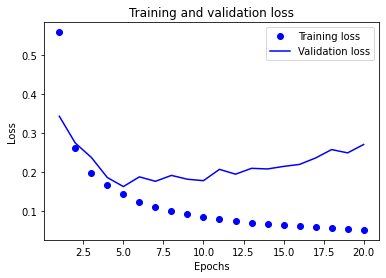

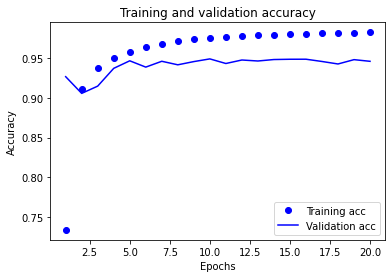

In [42]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [43]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16, input_length=max_len),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.summary()

model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           446992    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 16)           0         
_________________________________________________________________
dense_3 (Dense)              (None, 100, 16)           272       
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               41472     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 497,057
Trainable params: 497,057
Non-trainable params: 0
________________________________________________

In [44]:
results1 = model1.evaluate(x_test,  y_test, verbose=2)

print(results1)

1181/1181 - 6s - loss: 0.1600 - accuracy: 0.9566
[0.16004201769828796, 0.9565804600715637]


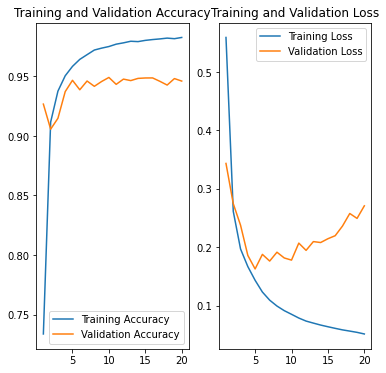

In [45]:
import matplotlib.pyplot as plt

history_dict1 = history1.history
history_dict1.keys()

acc1 = history_dict1['accuracy']
val_acc1 = history_dict1['val_accuracy']
loss1 = history_dict1['loss']
val_loss1 = history_dict1['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [46]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16,input_length=max_len),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.summary()

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           446992    
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 16)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 128)          41472     
_________________________________________________________________
dense_6 (Dense)              (None, 100, 16)           2064      
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               41472     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)               

In [47]:
results = model2.evaluate(x_test,  y_test, verbose=2)

print(results)

1181/1181 - 10s - loss: 0.1970 - accuracy: 0.9598
[0.19698254764080048, 0.9598104357719421]


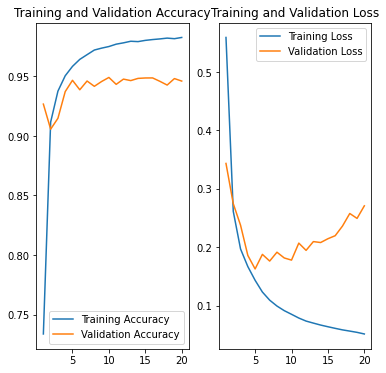

In [48]:
import matplotlib.pyplot as plt

history_dict2 = history2.history
history_dict2.keys()

acc1 = history_dict2['accuracy']
val_acc1 = history_dict2['val_accuracy']
loss1 = history_dict2['loss']
val_loss1 = history_dict2['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [64]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 100, input_length=max_len),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(32, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model3.summary()

model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 100, 100)          2793700   
_________________________________________________________________
dropout_20 (Dropout)         (None, 100, 100)          0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 96, 64)            32064     
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 48, 64)            0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 44, 32)            10272     
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 22, 32)            0         
_________________________________________________________________
bidirectional_6 (Bidirection (None, 128)             

In [65]:
results = model3.evaluate(x_test,  y_test, verbose=2)

print(results)

1181/1181 - 4s - loss: 0.2513 - accuracy: 0.9567
[0.251325786113739, 0.9567128419876099]


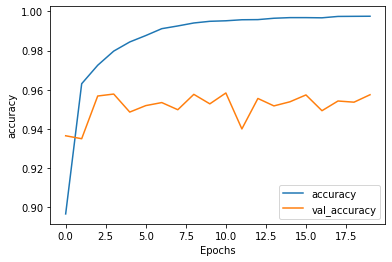

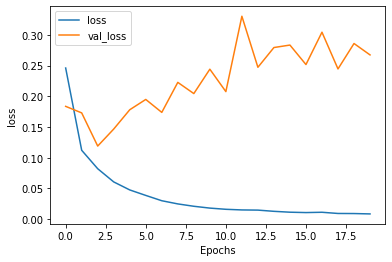

In [66]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

plot_graphs(history3, 'accuracy')
plot_graphs(history3, 'loss')


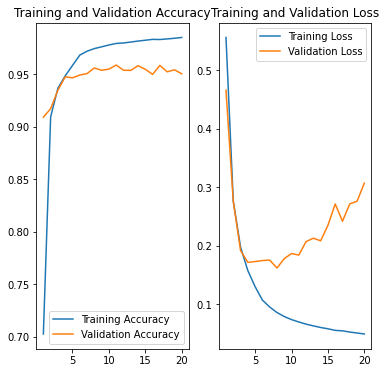

In [0]:
import matplotlib.pyplot as plt

history_dict3 = history3.history
history_dict3.keys()

acc1 = history_dict3['accuracy']
val_acc1 = history_dict3['val_accuracy']
loss1 = history_dict3['loss']
val_loss1 = history_dict3['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [68]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64, input_length=max_len),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(32, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(3),
    tf.keras.layers.Conv1D(32, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(3),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model4.summary()

model4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history4 = model4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val),
                    verbose=1)


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 100, 64)           1787968   
_________________________________________________________________
dropout_22 (Dropout)         (None, 100, 64)           0         
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 96, 32)            10272     
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 32, 32)            0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 28, 32)            5152      
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 9, 32)             0         
_________________________________________________________________
bidirectional_7 (Bidirection (None, 128)             

In [69]:
results = model4.evaluate(x_test,  y_test, verbose=2)

print(results)

1181/1181 - 4s - loss: 0.2940 - accuracy: 0.9561
[0.2939821481704712, 0.9561303853988647]


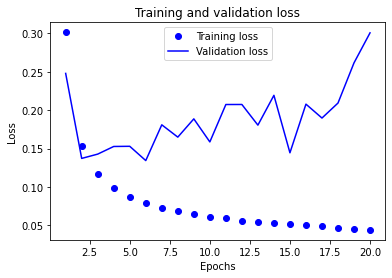

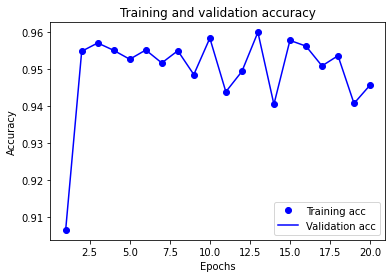

In [70]:
import matplotlib.pyplot as plt

history_dict4 = history4.history
history_dict4.keys()

acc1 = history_dict2['accuracy']
val_acc1 = history_dict2['val_accuracy']
loss1 = history_dict2['loss']
val_loss1 = history_dict2['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss1, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, val_acc1, 'bo', label='Training acc')
plt.plot(epochs, val_acc1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [74]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64, input_length=max_len),
    tf.keras.layers.Conv1D(16, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, dropout=0.2)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model5.summary()

model5.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history5 = model5.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val),
                    verbose=1)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 100, 64)           1787968   
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 96, 16)            5136      
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 48, 16)            0         
_________________________________________________________________
dense_26 (Dense)             (None, 48, 16)            272       
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 48, 128)           41472     
_________________________________________________________________
dense_27 (Dense)             (None, 48, 16)            2064      
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 128)             

1181/1181 - 8s - loss: 0.3042 - accuracy: 0.9534
[0.30423879623413086, 0.9534034132957458]


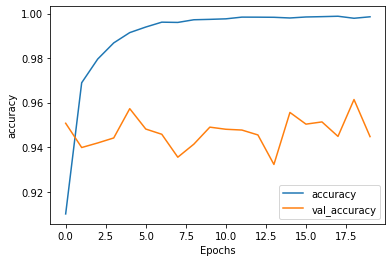

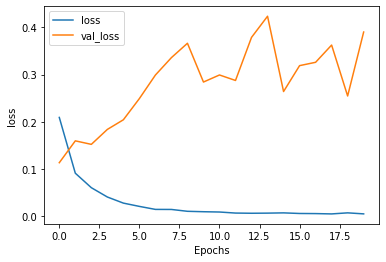

In [75]:
results = model5.evaluate(x_test,  y_test, verbose=2)

print(results)

plot_graphs(history5, 'accuracy')
plot_graphs(history5, 'loss')